In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import collections
import numpy as np
from sklearn.datasets import make_blobs
import umap.umap_ as umap
from seirsplus.models import *
from seirsplus.networks import *
import statistics
import seir
from seir_experiments import * 
import statistics

/home/u72216/.local/lib/python3.7/site-packages/numba/core/cpu.py:78: UserWarning: Numba extension module 'sdc' failed to load due to 'VersionConflict((numba 0.53.1 (/home/u72216/.local/lib/python3.7/site-packages), Requirement.parse('numba<0.53,>=0.52.0')))'.
  numba.core.entrypoints.init_all()
/home/u72216/.local/lib/python3.7/site-packages/numba/core/cpu.py:78: UserWarning: Numba extension module 'numba_dppy.numpy_usm_shared' failed to load due to 'ImportError(cannot import name 'allocator' from 'numba.core.pythonapi' (/home/u72216/.local/lib/python3.7/site-packages/numba/core/pythonapi.py))'.
  numba.core.entrypoints.init_all()


In [3]:
def plot_degree_dist(G, t = 0.8):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    fig, ax = plt.subplots()
    ax.bar(deg, cnt, width=0.80,log =True)

    plt.title("Degree Histogram")
    plt.ylabel("Count")
    plt.xlabel("Degree")
 
    #plt.xlim(1, max(deg))
    #plt.ylim(1, max(cnt))
    #ax.set_xticks([d + 0.4 for d in deg])
    #ax.set_xticklabels(deg)
    plt.show()
    return deg,cnt

In [3]:
def ipfnB(G1,s=10000,e=1,i=1):
#s = no of points
    SIGMA  = 1/5.2
    GAMMA  = 1/10
    MU_I   = 0.002
    
    R0     = 2.5
    BETA   = 1/(1/GAMMA) * R0
    BETA_Q = 0.5*BETA

    P      = 0.2
    Q      = 0.05
    
    E=s*e/100
    I=s*i/100
    
    model_base = SEIRSNetworkModel(G       = G1, 
                          beta    = BETA, 
                          sigma   = SIGMA, 
                          gamma   = GAMMA, 
                          initE = E, initI = I)
    
    model_base.run(T=300)
    fig,axs = model_base.figure_basic()
    
    line = axs.lines[1]
    p = line.get_data()
    p0 = p[0].compressed()
    p1 = p[1].compressed()
    #Maximum
    m = max(p[1])
    #Days Max
    ind= numpy.argmax(p[1])
    d = p[0][numpy.argmax(p[1])]
    #Mean and St Deviation
    mean  = statistics.mean(p1)
    stdev =  statistics.stdev(p1)
    line1 = axs.lines[2]
    w = line1.get_data()
    #Total Infections
    tot = 1 -(w[1][w[1].shape[0]-1])
    tp = 0.1*m
    np = 0.9*m
    #Ten Percent
    tpl =[]
    for i in range(len(p1)):
        x = numpy.abs(p1[i]-tp)
        if(x<0.001):
            #print(p1[i],x,p0[i])
            tpl.append(p0[i])
    tplval = statistics.mean(tpl)
    
    #Ninety Percent
    nplfh =[]
    nplsh = []
    for i in range(ind):
        x = numpy.abs(p1[i]-np)
        if(x<0.001):
            #print(p1[i],x,p0[i])
            nplfh.append(p0[i])
    for i in range(ind, len(p1)):
        x = numpy.abs(p1[i]-np)
        if(x<0.001):
            #print(p1[i],x,p0[i])
            nplsh.append(p0[i])
    npl=[(statistics.mean(nplfh)),(statistics.mean(nplsh))]
    
    
    return [m,d,tot,tplval,npl, mean, stdev],p

In [3]:
def calc_euclid(x,y):
    dist = sum((x-y)**2)

    return dist

In [1]:
ax,d= plot_degree_dist(2,20,[0.4,0.2,0.01])

NameError: name 'plot_degree_dist' is not defined

In [5]:
def plot_degree_dist(min_degree, mean_degree, gammas):
    
    N=10000
    fig, ax = plt.subplots()
    deg_list=[]
    for gamma in gammas:
        degs = generate_power_law_degrees(N, min_degree, mean_degree, gamma)
        # Degree histogram
        ax = sns.distplot(degs, kde=False, label=gamma, ax=ax)
        # hist_kws={'alpha':0.2}, bins=np.arange(0, 1200, 20),
        deg_list.append(degs)
    ax.set_yscale('log')
    ax.set_xlabel('Degree')
    ax.set_ylabel('Number of nodes')
    ax.legend(title='gamma')
    ax.set_title(f'Degree distribution (log scale) for N={N} nodes, mean={mean_degree}')
    print(np.median(degs), np.sort(degs)[-int(0.001 * N)])  # (median, top 0.1%)
    return ax,deg_list

In [9]:
#Sort Key
def mykey(x):
    return(x[0])

In [10]:
s = 10000
data1,y1 = make_blobs(n_samples=s,n_features=2,cluster_std=3)

In [ ]:
graphs = []
for deg in d:
    g1=nx.Graph()
    g1.add_nodes_from(range(10000))
    for i in range(len(data1)):

        dlist=[]
        for j in range(len(data1)):
            diff = calc_euclid(data1[i],data1[j])
            dlist.append([diff,j])
        dlist.sort(key=mykey)
        #print(dlist[:20])
        edgelist=[]
        cntr= 0
        p=1
        while(cntr!=deg[i] and p<10000):
        #for k in range(deg[i]):
            k= dlist[p][1]
            if(g1.degree[k]<deg[j]):
                edgelist.append((i,k))
                cntr=cntr+1
            p=p+1

        g1.add_edges_from(edgelist)
        if(i%1000==0): print(i)
    graphs.append(g1)
    

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
0
1000
2000
3000
4000


In [12]:
g1=nx.Graph()
g1.add_nodes_from(range(10000))
for i in range(len(data1)):

    dlist=[]
    for j in range(len(data1)):
        diff = calc_euclid(data1[i],data1[j])
        dlist.append([diff,j])
    dlist.sort(key=mykey)
    #print(dlist[:20])
    edgelist=[]
    cntr= 0
    p=1
    while(cntr!=d[0][i] and p<10000):
    #for k in range(deg[i]):
        k= dlist[p][1]
        if(g1.degree[k]<d[0][j]):
            edgelist.append((i,k))
            cntr=cntr+1
        p=p+1

    g1.add_edges_from(edgelist)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118


KeyboardInterrupt: 

3

In [ ]:
g1=nx.Graph()
g1.add_nodes_from(range(10000))
for i in range(len(data1)):
    dlist=[]
    for j in range(len(data1)):
        diff = calc_euclid(data1[i],data1[j])
        dlist.append([diff,j])
    dlist.sort(key=mykey)
    #print(dlist[:20])
    edgelist=[]
    cntr= 0
    p=1
    while(cntr!=deg[i]):
    for k in range(deg[i]):
        k= dlist[p][1]
        if(G_k.degree[k]<g1.degree[k]):
            edgelist.append((i,k))
            cntr=cntr+1
        p=p+1
        
    g1.add_edges_from(edgelist)
    
    

In [ ]:
res1,line1 = ipfnB(graphs[0],e=1,i=1)
res2,line2 = ipfnB(graphs[1],e=1,i=1)
res3,line3 = ipfnB(graphs[2],e=1,i=1)


In [ ]:
x1 = line1[0].compressed()
y1 = line1[1].compressed()
plt.plot(x1, y1, label = "0.4")

x2 = line2[0].compressed()
y2 = line2[1].compressed()
plt.plot(x2, y2, label = "0.2")

x3 = line3[0].compressed()
y3 = line3[1].compressed()
plt.plot(x3, y3, label = "0.1")

plt.legend()
plt.show()

In [8]:
data1[1000]

array([3.08563115, 1.8172595 ])

In [ ]:
distance_list=[]
for i in range(len(data1)):
    diff = calc_euclid(data1[789],data1[i])
    distance_list.append(diff)    

    
    
fig, ax = plt.subplots(2)  
ax0= sns.histplot(distance_list, kde=False, bins = 30,ax=ax[0])
ax0.set_xlabel('Distance')
ax0.set_ylabel('Number of nodes')
ax0.set_title(f'Degree distribution normal and log scale for spatial data')

ax1= sns.histplot(distance_list, kde=False, bins = 30,ax=ax[1])
ax1.set_xlabel('Distance')
ax1.set_ylabel('Number of nodes')
ax1.set_yscale('log')


/home/u72216/.local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


13.0 212


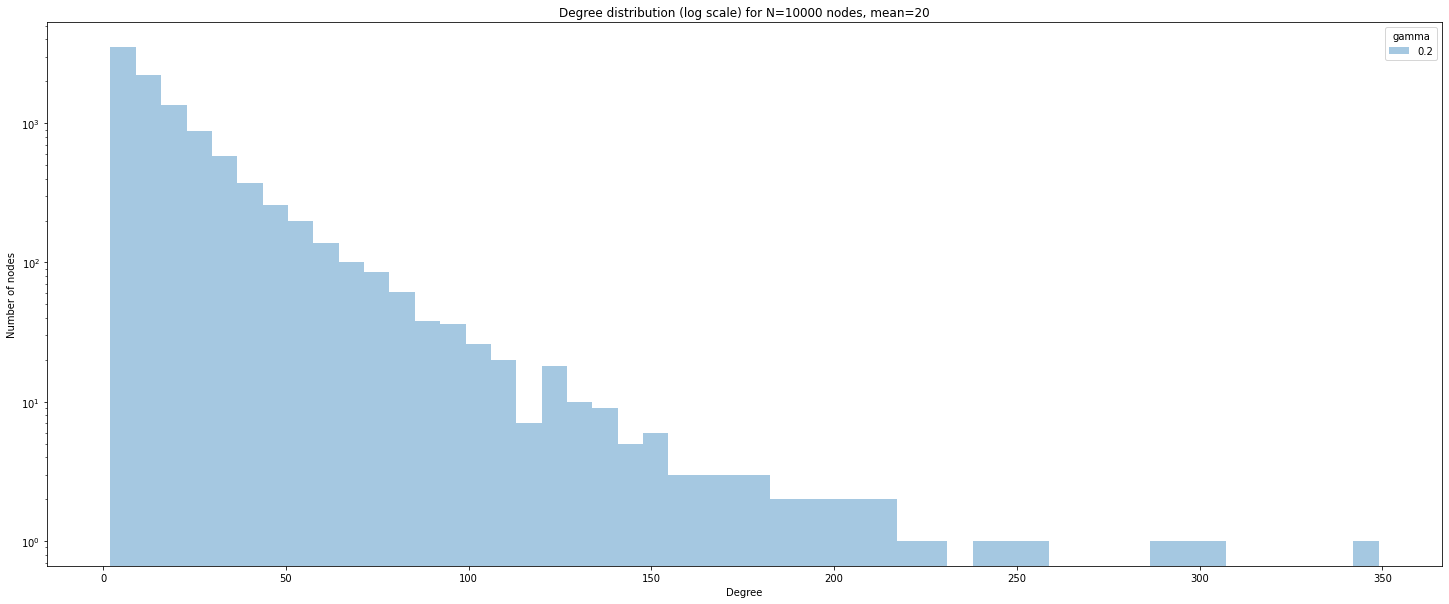

In [35]:
ax,d= plot_degree_dist(2,20,[0.2])

In [38]:
g=nx.Graph()
g.add_nodes_from(range(10000))
for i in range(len(data1)):
    dlist=[]
    for j in range(len(data1)):
        diff = calc_euclid(data1[i],data1[j])
        dlist.append([diff,j])
    dlist.sort(key=mykey)
    #print(dlist[:20])
    edgelist=[]
    for k in range(d[0][i]):
        edgelist.append((i,dlist[k+1][1]))
    g.add_edges_from(edgelist)
    if(i%100==0): print(i)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300


KeyboardInterrupt: 